# Supervised learning workshop (Code)

## Requiered packages

In [ ]:
%pip install -r requirements.txt

## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import mpl_toolkits.mplot3d
import plotly_express as px
import random
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Data set

In [2]:
data = pd.read_csv('MatrizdeFrecuenciaVectorizer_Stemming_Word.csv')
data

,clase_cluster,adecu,adult,aere,aeropuert,alejandr,alter,am,ambulatori,amplitud,...,siluet,taman,tej,telefon,telefonos,traque,universitari,vasculatur,vered,via
0,covid,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.117460,0.000000,0.100812,0.234920,0.000000,0.000000,0.000000
1,covid,0.204950,0.000000,0.000000,0.000000,0.186139,0.126277,0.175350,0.0,0.0,...,0.000000,0.000000,0.128614,0.084098,0.000000,0.072178,0.168196,0.000000,0.000000,0.000000
2,covid,0.000000,0.000000,0.325648,0.000000,0.000000,0.000000,0.079756,0.0,0.0,...,0.000000,0.000000,0.000000,0.076502,0.000000,0.000000,0.153003,0.000000,0.000000,0.203933
3,covid,0.129423,0.000000,0.000000,0.000000,0.235087,0.159484,0.110731,0.0,0.0,...,0.000000,0.000000,0.162436,0.106213,0.000000,0.091159,0.212426,0.000000,0.000000,0.000000
4,covid,0.000000,0.000000,0.180967,0.000000,0.000000,0.000000,0.177285,0.0,0.0,...,0.089613,0.099570,0.000000,0.085026,0.000000,0.072975,0.170052,0.000000,0.000000,0.113328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,otros,0.000000,0.155779,0.000000,0.113704,0.000000,0.000000,0.165036,0.0,0.0,...,0.083421,0.092691,0.000000,0.000000,0.113704,0.067933,0.000000,0.000000,0.113704,0.105498
802,otros,0.000000,0.144301,0.000000,0.105326,0.000000,0.000000,0.076438,0.0,0.0,...,0.077275,0.085861,0.000000,0.000000,0.105326,0.062928,0.000000,0.152281,0.105326,0.097725
803,otros,0.000000,0.156941,0.000000,0.114552,0.352992,0.119736,0.166267,0.0,0.0,...,0.000000,0.000000,0.121952,0.000000,0.114552,0.068439,0.000000,0.000000,0.114552,0.106285
804,otros,0.000000,0.000000,0.000000,0.136171,0.000000,0.000000,0.098823,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.136171,0.081356,0.000000,0.000000,0.136171,0.126344


## Sampling 

In [3]:
######################Different sample types##########################
random.seed(42)
def uniformShuffle(df):
    '''
    Shuffle the dataframe uniformly
    '''
    index = random.sample(list(df.index),len(df))
    return df.iloc[index].reset_index().drop(columns=['index'])

def sampler1_1 (n,df):
    '''
    Sample the data based on an uniform distribution
    '''
    index=random.sample(list(df.index),n)
    sample1=df.iloc[index,:]
    return sample1


def samplerPoisson(n,df):
    '''
    Sample the data based on a Poisson distribution
    '''
    temp_df_idx=list(df.index)
    sampleT_idx=[]
    for i in range(n):
        state=True
        while state:
            idxPoisson=np.random.poisson(len(temp_df_idx)/2)
            if idxPoisson <= len(temp_df_idx)-1:
                state = False
        if len(temp_df_idx)==1:
            sampleT_idx.append(temp_df_idx[0])
        else:
            sampleT_idx.append(temp_df_idx[idxPoisson])
            temp_df_idx.remove(temp_df_idx[idxPoisson])

    return df.iloc[sampleT_idx]

def samplerBinomial(n,df):
    '''
    Sample the data based on a Binomial distribution
    '''
    temp_df_idx=list(df.index)
    sampleT_idx=[]
    for i in range(n):
        state=True
        while state:
            idxPoisson=np.random.binomial(len(temp_df_idx),0.5)
            if idxPoisson <= len(temp_df_idx)-1:
                state = False
        if len(temp_df_idx)==1:
            sampleT_idx.append(temp_df_idx[0])
        else:
            sampleT_idx.append(temp_df_idx[idxPoisson])
            temp_df_idx.remove(temp_df_idx[idxPoisson])
    return df.iloc[sampleT_idx]

### Exploring different sampling techniques and visualizing the data

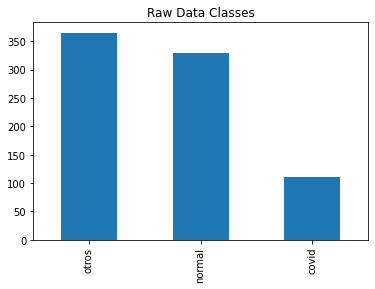

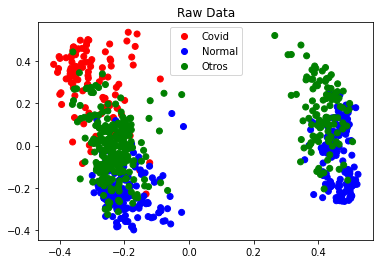

In [4]:
#Visualizacion

def visualization_pca_2D(data,title):
    '''
    Visualization of the data using PCA
    '''
    X=data.iloc[:,1:data.shape[1]]
    class_replace=data.clase_cluster
    class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
    pca = PCA(n_components=2).fit(X)
    data2D = pca.transform(X)
    colors = ListedColormap(['r','b','g'])
    scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
    plt.title(title)
    plt.show()

def plot3D(df,X,Y,Z,color):
    return px.scatter_3d(df,x=X,y=Y,z=Z,color=color,
                        color_discrete_map={"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})
'''
Visualization of the data using PCA
'''
def visualization_pca_3D(data,title):
    '''
    Visualization of the data using PCA
    '''
    X=data.iloc[:,1:data.shape[1]]
    class_replace=data.clase_cluster
    class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
    pca = PCA(n_components=3).fit(X)
    data3D = pca.transform(X)
    fig = plot3D(data,data3D[:,0],data3D[:,1],data3D[:,2],data.clase_cluster)
    fig.show()


'''
Raw data classes
'''
data['clase_cluster'].value_counts().plot(kind='bar')
plt.title('Raw Data Classes')
plt.show()

visualization_pca_2D(data,'Raw Data')
visualization_pca_3D(data,'Raw Data')


In [5]:
#def pairplot_(df, hue):
#    plt.figure(figsize=(8, 8))
#    ax = sns.pairplot(df, hue)
#    plt.show()
#pairplot_(data,'clase_cluster')

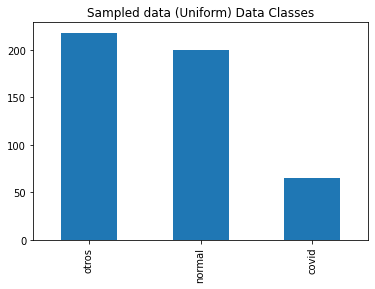

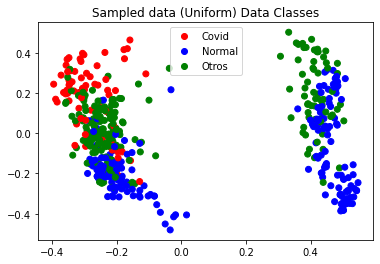

In [6]:
'''
Sampling with uniform distribution with uniformly sample data (best method according to class work)
'''
n=int(0.6*len(data))
sampled_df=sampler1_1(n,uniformShuffle(data))
sampled_df['clase_cluster'].value_counts().plot(kind='bar')
plt.title('Sampled data (Uniform) Data Classes')
plt.show()

visualization_pca_2D(sampled_df,'Sampled data (Uniform) Data Classes')
visualization_pca_3D(sampled_df,'Sampled data (Uniform) Data Classes')

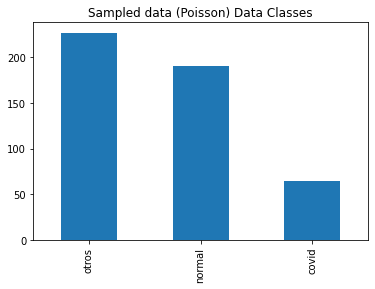

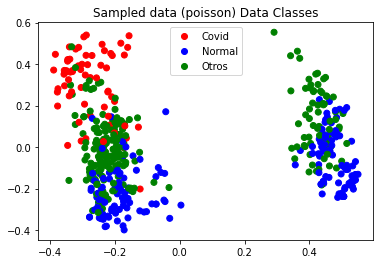

In [7]:
'''
Sampling with poisson distribution with uniformly sample data (best method according to class work)
'''
n=int(0.6*len(data))
sampled_df=samplerPoisson(n,uniformShuffle(data))
sampled_df['clase_cluster'].value_counts().plot(kind='bar')
plt.title('Sampled data (Poisson) Data Classes')
plt.show()

visualization_pca_2D(sampled_df,'Sampled data (poisson) Data Classes')
visualization_pca_3D(sampled_df,'Sampled data (poisson) Data Classes')

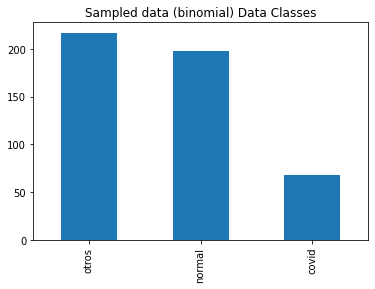

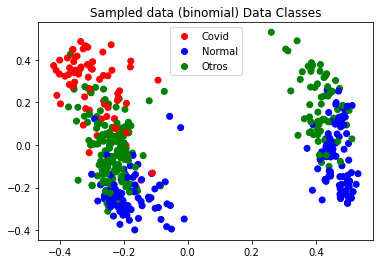

In [8]:
'''
Sampling with binomial distribution with uniformly sample data (best method according to class work)
'''
n=int(0.6*len(data))
sampled_df=samplerBinomial(n,uniformShuffle(data))
sampled_df['clase_cluster'].value_counts().plot(kind='bar')
plt.title('Sampled data (binomial) Data Classes')
plt.show()

visualization_pca_2D(sampled_df,'Sampled data (binomial) Data Classes')
visualization_pca_3D(sampled_df,'Sampled data (binomial) Data Classes')

Final data for training: 483


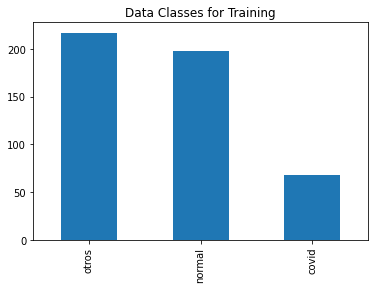

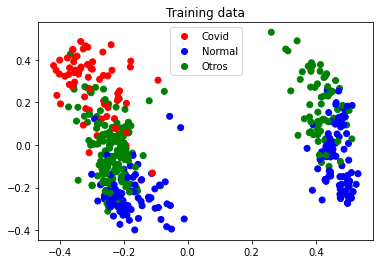

Final data for testing and validation: 323


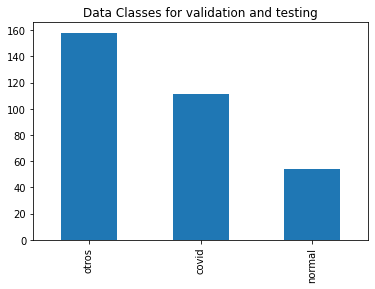

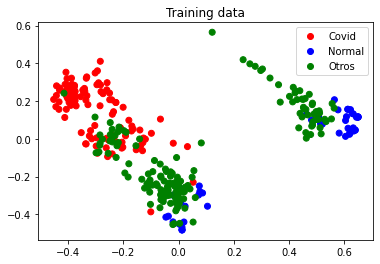

In [9]:
#Final Data disposition
#Considering the sample methods, the best method is uniform sampling
#The final data for Training, testing and validation is plotted next
n=int(0.6*len(data))
print('Final data for training:', n)
sampled_df_train=sampler1_1(n,uniformShuffle(data))
sampled_df['clase_cluster'].value_counts().plot(kind='bar')
plt.title('Data Classes for Training')
plt.show()
visualization_pca_2D(sampled_df,'Training data')
visualization_pca_3D(sampled_df,'Training data')

data_test_validation=data.drop(sampled_df.index)
print('Final data for testing and validation:', len(data_test_validation))
data_test_validation['clase_cluster'].value_counts().plot(kind='bar')
plt.title('Data Classes for validation and testing')
plt.show()
visualization_pca_2D(data_test_validation,'Training data')
visualization_pca_3D(data_test_validation,'Training data')

## Learning guarantee criteria for different learning machines

In [10]:
#Table of learning guarantee criteria (general)
def pac_learning_guarantee (epsilon,H,delta):
    return (1/epsilon)*(np.log(H)+np.log(1/delta))

#For the trees
def pac_learning_guarantee_tree (epsilon,delta,depth,features):
    n=features
    k=depth
    M=(np.log(2)/(2*epsilon**2))*(((2**k)-1)*(1+np.log2(n))+1+np.log(1/delta))
    return M

#For the linear regresor
def pac_learning_guarantee_linear (epsilon,delta,H):
    #H=n+1, because the first value is the intercept b_0
    M=(1/epsilon)*(np.log(H+1)+np.log(1/delta))
    return M
#For the SVM_polynomial
def pac_learning_guarantee_svm(epsilon,delta,order,features):
    p=order
    D=features
    H=(m.factorial(D+p-1)/(m.factorial(p)*m.factorial(D-1)))+1
    M=(1/epsilon)*(np.log(H)+np.log(1/delta))
    return M

#For the SVM_lineal
def pac_learning_guarantee_svm_lin(epsilon,delta,features):
    D=features
    H=D+1
    M=(1/epsilon)*(np.log(H+1)+np.log(1/delta))
    return M



In [11]:
data.shape

(806, 131)

In [12]:
'''To generate table for different learning and training criteria
'''
errors=[(0.2,0.2),(0.10,0.10),(0.05,0.05)] #(delta,epsilon)
learning_machines=['tree','logistic','svm_poly','svm_rbf','svm_linear']
#Params for the trees
depth=3
features=131
#Params for the linear regresor
params=131
#Params for the SVM pol kernel
order=2
features=131
#Params for the SVM rbf kernel
#Remeber is infinite by theorem of the kernel
#Params for the SVM linear kernel
features=131
dict={}
for e in errors:
    for lm in learning_machines:
        if lm=='tree':
            dict[(e[0],e[1]),lm]=pac_learning_guarantee_tree(e[0],e[1],depth,features)
        elif lm=='logistic':
            dict[(e[0],e[1]),lm]=pac_learning_guarantee_linear(e[0],e[1],params)
        elif lm=='svm_poly':
            dict[(e[0],e[1]),lm]=pac_learning_guarantee_svm(e[0],e[1],order,features)
        elif lm=='svm_rbf':
            dict[(e[0],e[1]),lm]=np.Inf
        elif lm=='svm_linear':
            dict[(e[0],e[1]),lm]=pac_learning_guarantee_svm_lin(e[0],e[1],features)
#dict to dataframe
pop = pd.Series(dict.values(), index=dict.keys())
index = pd.MultiIndex.from_tuples(dict.keys())
pop = pop.reindex(index)
pop_df = pop.unstack()
pop_df.index.names = ['(delta/epsilon)']
pop_df

,logistic,svm_linear,svm_poly,svm_rbf,tree
(delta/epsilon),,,,,
"(0.05, 0.05)",157.570684,157.721628,241.214000,inf,8349.608417
"(0.1, 0.1)",71.853870,71.929342,113.675528,inf,2063.379454
"(0.2, 0.2)",32.461199,32.498935,53.372028,inf,509.839201


## Modeling pipeline

In [13]:
def data_spliter(data,percentage,n=0):
    '''
    This function splits the data into training, validation and testing data
    n is the number of data to be used for training. Default is 0, which means all the data will be used
    '''
    if n==0:
        n=int(percentage*len(data))
        train_data=sampler1_1(n,uniformShuffle(data))
        X_train=train_data.iloc[:,1:train_data.shape[1]]
        y_train=train_data.iloc[:,0]
        data_test_validation=data.drop(train_data.index)
        data_test=data_test_validation.sample(frac=0.5,random_state=42)
        data_validation=data_test_validation.drop(data_test.index)
        X_test=data_test.iloc[:,1:data_test.shape[1]]
        y_test=data_test.iloc[:,0]
        X_validation=data_validation.iloc[:,1:data_validation.shape[1]]
        y_validation=data_validation.iloc[:,0]
        return X_train,y_train,X_test,y_test,X_validation,y_validation
    else:
        train_data=sampler1_1(n,uniformShuffle(data))
        X_train=train_data.iloc[:,1:train_data.shape[1]]
        y_train=train_data.iloc[:,0]
        data_test_validation=data.drop(train_data.index)
        data_test=data_test_validation.sample(frac=0.5,random_state=42)
        data_validation=data_test_validation.drop(data_test.index)
        X_test=data_test.iloc[:,1:data_test.shape[1]]
        y_test=data_test.iloc[:,0]
        X_validation=data_validation.iloc[:,1:data_validation.shape[1]]
        y_validation=data_validation.iloc[:,0]
        return X_train,y_train,X_test,y_test,X_validation,y_validation


In [14]:
#Training error
def training_error(y_train,y_pred_train):
    '''  This function calculates the training error of the model'''
    error=0
    for i in range(len(y_train)):
        if y_train[i]!=y_pred_train[i]:
            error+=1
    return error/len(y_train)

#Test error
def testing_error(y_test,y_pred_test):
    '''  This function calculates the testing error of the model'''
    error=0
    for i in range(len(y_test)):
        if y_test[i]!=y_pred_test[i]:
            error+=1
    #Using an uniform probability for each class, the error is the sum of the errors of each class divided by the number of samples
    return error/len(y_test)

In [15]:
#Estimated number of registers for every learning machine
#Considering a delta and epsilon of 0.05 for every learning machine except fro the tree and SVM, which considers a delta and epsilon of 0.2
# and 60% of the data respectively.
N_training=[157,158,241,483,510]
#[logistic,svm_linear,svm_poly,svm_rbf,tree]


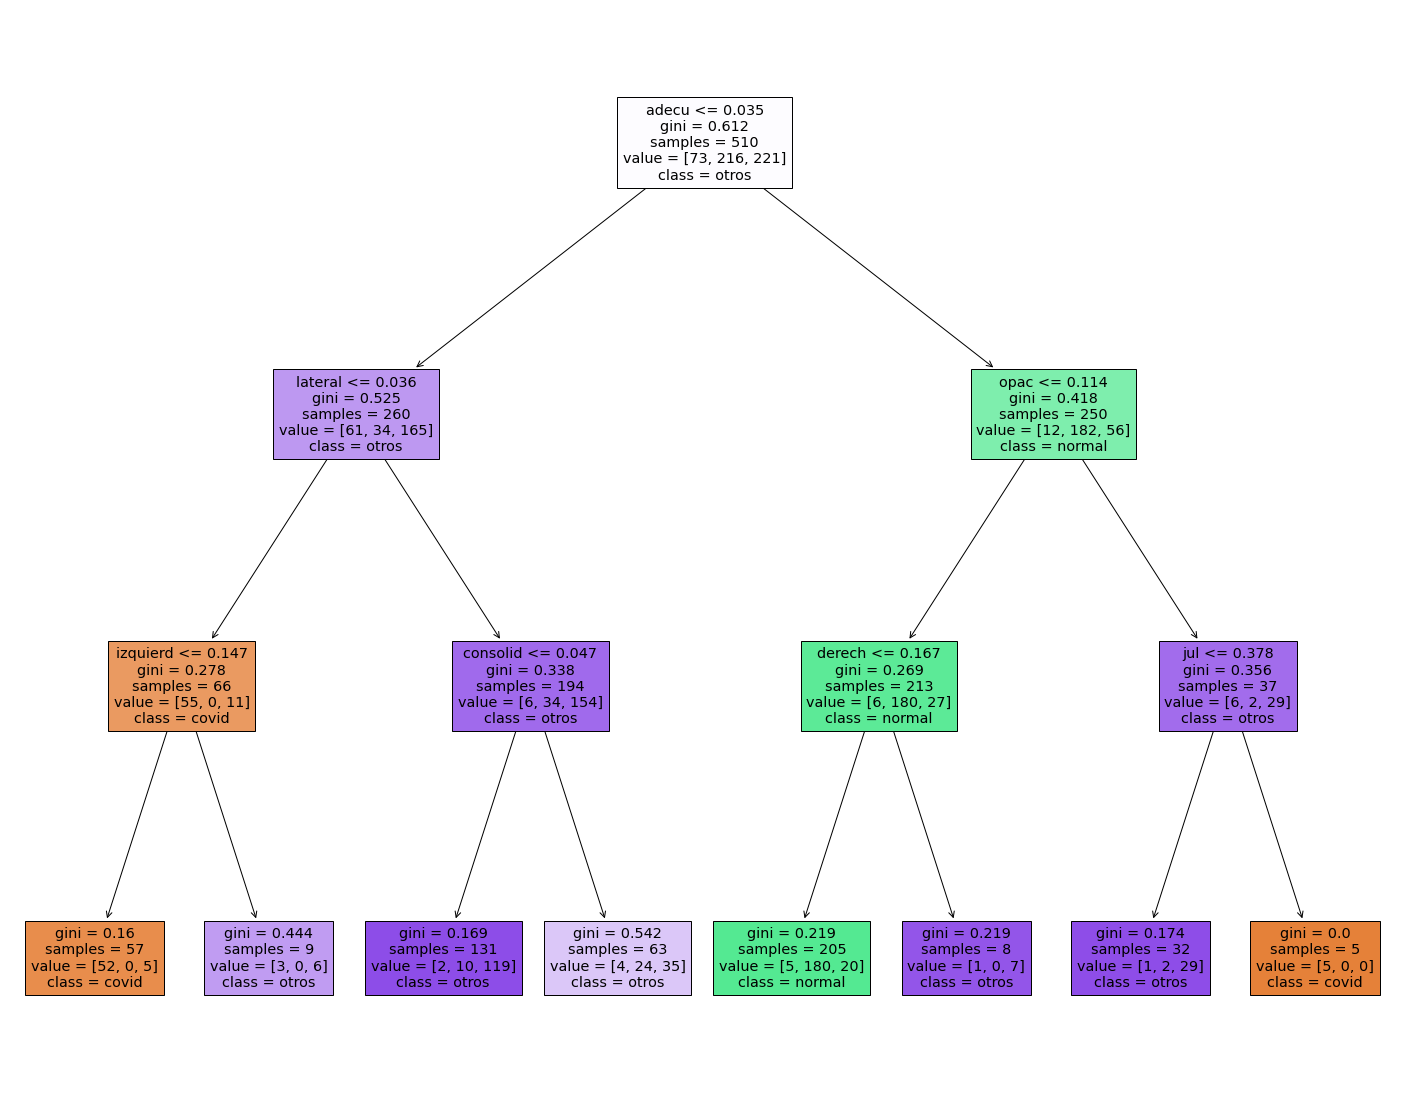

,training_error,testing_error,validation_error
covid_class,0.219178,0.235294,0.333333
normal_class,0.166667,0.188406,0.145161
otros_class,0.113122,0.161290,0.117647


In [16]:
#Tree
N_train_tree=N_training[4]
depth=3
features=131
clf = DecisionTreeClassifier(random_state=42,max_depth=depth,max_features=features)
#rename target values

#Sampling and splitting the data
X_train,y_train,X_test,y_test,X_validation,y_validation = data_spliter(data,0.6,N_train_tree)
#Training
clf.fit(X_train,y_train)
#Prediction
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_validation=clf.predict(X_validation)
#plotting the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=data.columns[1:],
                   class_names=data.iloc[:,0].unique(),
                   filled=True)
plt.show()


#Performance measure of the model (traing and testing error)
#Training error
y_true=y_train
y_pred=y_pred_train
df=pd.DataFrame({'y_true':y_true,'y_pred':y_pred})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
training_error_0=training_error(df_0['y_true'].values,df_0['y_pred'].values)
training_error_1=training_error(df_1['y_true'].values,df_1['y_pred'].values)
training_error_2=training_error(df_2['y_true'].values,df_2['y_pred'].values)
training_error_pd=pd.Series({'covid_class':training_error_0,'normal_class':training_error_1,'otros_class':training_error_2},name='training_error')

#Testing error
y_true=y_test
y_pred=y_pred_test
df=pd.DataFrame({'y_true':y_test,'y_pred':y_pred_test})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
testing_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
testing_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
testing_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
testing_error_0
testing_error_pd=pd.Series({'covid_class':testing_error_0,'normal_class':testing_error_1,'otros_class':testing_error_2},name='testing_error')

#validation error
y_true=y_validation
y_pred=y_pred_validation
df=pd.DataFrame({'y_true':y_validation,'y_pred':y_pred_validation})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
validation_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
validation_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
validation_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
validation_error_pd=pd.Series({'covid_class':validation_error_0,'normal_class':validation_error_1,'otros_class':validation_error_2},name='validation_error')

#Concatetaion of the errors
error_pd_tree=pd.concat([training_error_pd,testing_error_pd,validation_error_pd],axis=1)
error_pd_tree

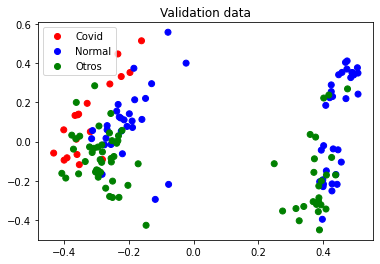

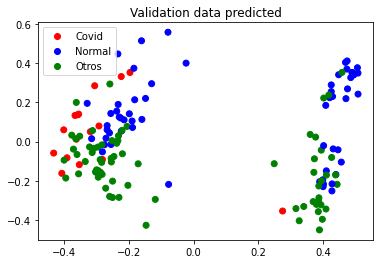

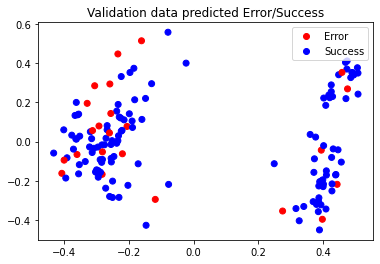

pred
0     23
1    125
dtype: int64


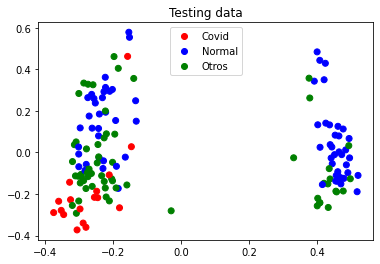

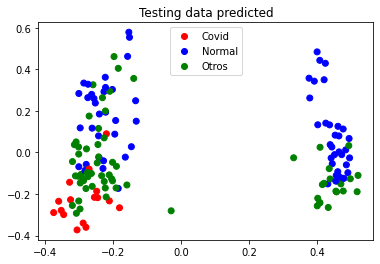

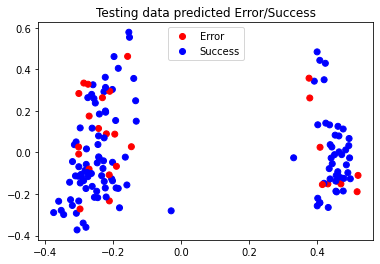

pred
0     27
1    121
dtype: int64


In [17]:
#Plotting results

X=X_validation
class_replace=y_validation
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data')
plt.show()


X=X_validation
class_replace=pd.DataFrame([y_pred_validation])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data predicted')
plt.show()

y_pred_validation=pd.DataFrame(y_pred_validation,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_validation)):
    if y_pred_validation.iloc[i][0]==y_validation.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_validation
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Validation data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


#Plotting results

X=X_test
class_replace=y_test
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data')
plt.show()


X=X_test
class_replace=pd.DataFrame([y_pred_test])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data predicted')
plt.show()

y_pred_testing=pd.DataFrame(y_pred_test,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_testing)):
    if y_pred_testing.iloc[i][0]==y_test.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_test
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Testing data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


In [18]:
#SVC Linear
N_train_svc_linear=N_training[1]

#Sampling and splitting the data
X_train,y_train,X_test,y_test,X_validation,y_validation = data_spliter(data,0.6,N_train_svc_linear)
#Training
model = SVC(kernel='linear')
clf = model.fit(X_train, y_train)
#Prediction
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_validation=clf.predict(X_validation)

#Performance measure of the model (traing and testing error)
#Training error
y_true=y_train
y_pred=y_pred_train
df=pd.DataFrame({'y_true':y_true,'y_pred':y_pred})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
training_error_0=training_error(df_0['y_true'].values,df_0['y_pred'].values)
training_error_1=training_error(df_1['y_true'].values,df_1['y_pred'].values)
training_error_2=training_error(df_2['y_true'].values,df_2['y_pred'].values)
training_error_pd=pd.Series({'covid_class':training_error_0,'normal_class':training_error_1,'otros_class':training_error_2},name='training_error')

#Testing error
y_true=y_test
y_pred=y_pred_test
df=pd.DataFrame({'y_true':y_test,'y_pred':y_pred_test})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
testing_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
testing_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
testing_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
testing_error_0
testing_error_pd=pd.Series({'covid_class':testing_error_0,'normal_class':testing_error_1,'otros_class':testing_error_2},name='testing_error')

#validation error
y_true=y_validation
y_pred=y_pred_validation
df=pd.DataFrame({'y_true':y_validation,'y_pred':y_pred_validation})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
validation_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
validation_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
validation_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
validation_error_pd=pd.Series({'covid_class':validation_error_0,'normal_class':validation_error_1,'otros_class':validation_error_2},name='validation_error')

#Concatetaion of the errors
error_pd_svm_lin=pd.concat([training_error_pd,testing_error_pd,validation_error_pd],axis=1)
error_pd_svm_lin

,training_error,testing_error,validation_error
covid_class,0.210526,0.377358,0.333333
normal_class,0.016393,0.084507,0.048000
otros_class,0.089744,0.162791,0.134969


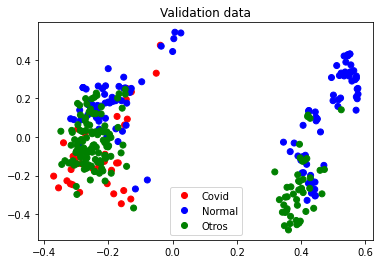

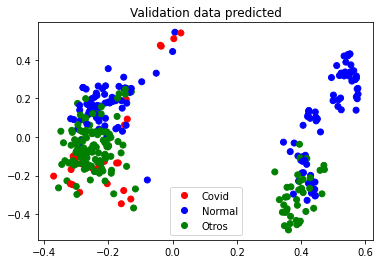

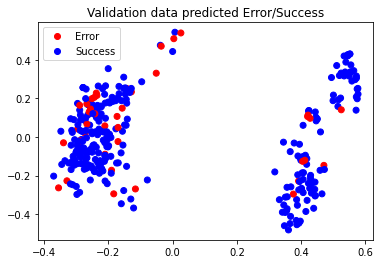

pred
0     40
1    284
dtype: int64


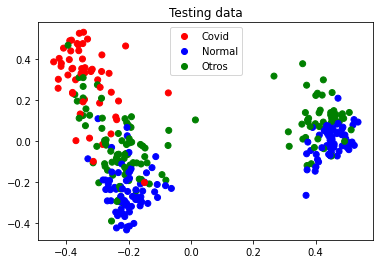

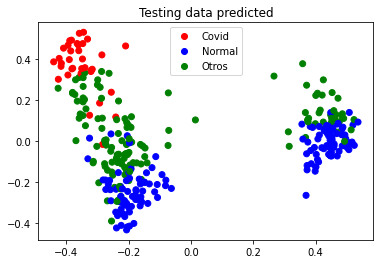

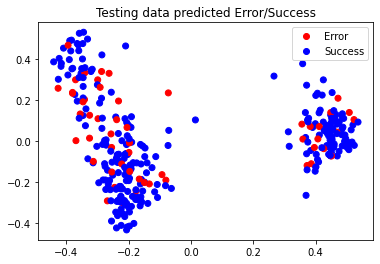

pred
0     53
1    271
dtype: int64


In [19]:
#Plotting results

X=X_validation
class_replace=y_validation
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data')
plt.show()


X=X_validation
class_replace=pd.DataFrame([y_pred_validation])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data predicted')
plt.show()

y_pred_validation=pd.DataFrame(y_pred_validation,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_validation)):
    if y_pred_validation.iloc[i][0]==y_validation.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_validation
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Validation data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


#Plotting results

X=X_test
class_replace=y_test
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data')
plt.show()


X=X_test
class_replace=pd.DataFrame([y_pred_test])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data predicted')
plt.show()

y_pred_testing=pd.DataFrame(y_pred_test,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_testing)):
    if y_pred_testing.iloc[i][0]==y_test.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_test
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Testing data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


In [20]:
#SVC poly
N_train_svc_poly=N_training[2]

#Sampling and splitting the data
X_train,y_train,X_test,y_test,X_validation,y_validation = data_spliter(data,0.6,N_train_svc_linear)
#Training
model = SVC(kernel="poly",degree=3)
clf = model.fit(X_train, y_train)
#Prediction
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_validation=clf.predict(X_validation)

#Performance measure of the model (traing and testing error)
#Training error
y_true=y_train
y_pred=y_pred_train
df=pd.DataFrame({'y_true':y_true,'y_pred':y_pred})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
training_error_0=training_error(df_0['y_true'].values,df_0['y_pred'].values)
training_error_1=training_error(df_1['y_true'].values,df_1['y_pred'].values)
training_error_2=training_error(df_2['y_true'].values,df_2['y_pred'].values)
training_error_pd=pd.Series({'covid_class':training_error_0,'normal_class':training_error_1,'otros_class':training_error_2},name='training_error')

#Testing error
y_true=y_test
y_pred=y_pred_test
df=pd.DataFrame({'y_true':y_test,'y_pred':y_pred_test})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
testing_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
testing_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
testing_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
testing_error_0
testing_error_pd=pd.Series({'covid_class':testing_error_0,'normal_class':testing_error_1,'otros_class':testing_error_2},name='testing_error')

#validation error
y_true=y_validation
y_pred=y_pred_validation
df=pd.DataFrame({'y_true':y_validation,'y_pred':y_pred_validation})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
validation_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
validation_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
validation_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
validation_error_pd=pd.Series({'covid_class':validation_error_0,'normal_class':validation_error_1,'otros_class':validation_error_2},name='validation_error')

#Concatetaion of the errors
error_pd_svm_pol=pd.concat([training_error_pd,testing_error_pd,validation_error_pd],axis=1)
error_pd_svm_pol



,training_error,testing_error,validation_error
covid_class,0.0,0.250000,0.194444
normal_class,0.0,0.134752,0.088000
otros_class,0.0,0.076336,0.104294


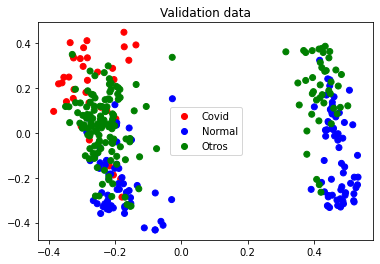

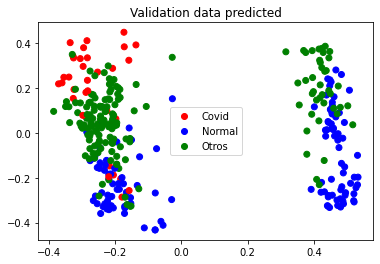

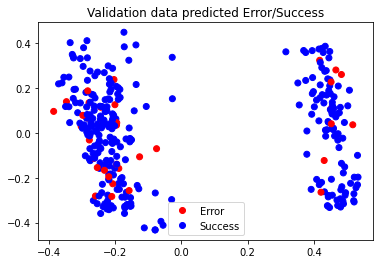

pred
0     35
1    289
dtype: int64


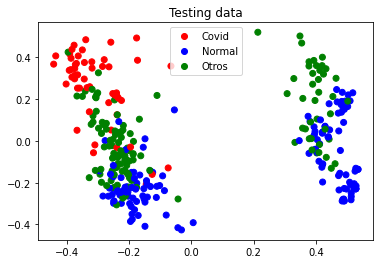

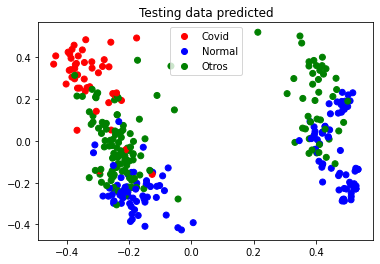

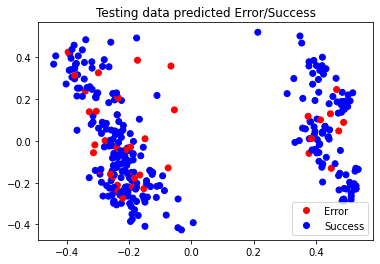

pred
0     42
1    282
dtype: int64


In [21]:
#Plotting results

X=X_validation
class_replace=y_validation
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data')
plt.show()


X=X_validation
class_replace=pd.DataFrame([y_pred_validation])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data predicted')
plt.show()

y_pred_validation=pd.DataFrame(y_pred_validation,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_validation)):
    if y_pred_validation.iloc[i][0]==y_validation.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_validation
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Validation data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


#Plotting results

X=X_test
class_replace=y_test
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data')
plt.show()


X=X_test
class_replace=pd.DataFrame([y_pred_test])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data predicted')
plt.show()

y_pred_testing=pd.DataFrame(y_pred_test,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_testing)):
    if y_pred_testing.iloc[i][0]==y_test.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_test
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Testing data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


In [22]:
#SVC rbf
N_train_svc_rbf=N_training[3]

#Sampling and splitting the data
X_train,y_train,X_test,y_test,X_validation,y_validation = data_spliter(data,0.6,N_train_svc_linear)
#Training
model = SVC(kernel="rbf")
clf = model.fit(X_train, y_train)
#Prediction
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_validation=clf.predict(X_validation)

#Performance measure of the model (traing and testing error)
#Training error
y_true=y_train
y_pred=y_pred_train
df=pd.DataFrame({'y_true':y_true,'y_pred':y_pred})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
training_error_0=training_error(df_0['y_true'].values,df_0['y_pred'].values)
training_error_1=training_error(df_1['y_true'].values,df_1['y_pred'].values)
training_error_2=training_error(df_2['y_true'].values,df_2['y_pred'].values)
training_error_pd=pd.Series({'covid_class':training_error_0,'normal_class':training_error_1,'otros_class':training_error_2},name='training_error')

#Testing error
y_true=y_test
y_pred=y_pred_test
df=pd.DataFrame({'y_true':y_test,'y_pred':y_pred_test})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
testing_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
testing_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
testing_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
testing_error_0
testing_error_pd=pd.Series({'covid_class':testing_error_0,'normal_class':testing_error_1,'otros_class':testing_error_2},name='testing_error')

#validation error
y_true=y_validation
y_pred=y_pred_validation
df=pd.DataFrame({'y_true':y_validation,'y_pred':y_pred_validation})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
validation_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
validation_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
validation_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
validation_error_pd=pd.Series({'covid_class':validation_error_0,'normal_class':validation_error_1,'otros_class':validation_error_2},name='validation_error')

#Concatetaion of the errors
error_pd_svm_rbf=pd.concat([training_error_pd,testing_error_pd,validation_error_pd],axis=1)
error_pd_svm_rbf



,training_error,testing_error,validation_error
covid_class,0.000000,0.230769,0.114286
normal_class,0.014286,0.145985,0.080000
otros_class,0.015385,0.118519,0.152439


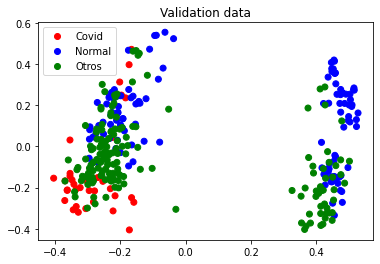

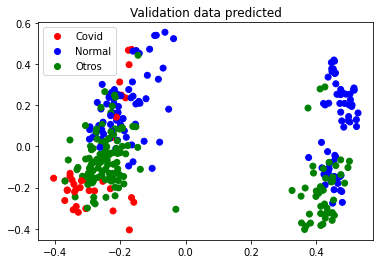

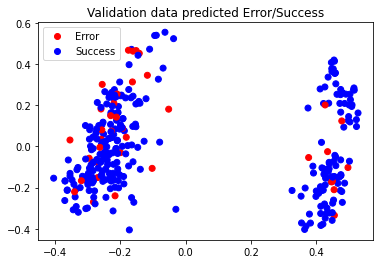

pred
0     39
1    285
dtype: int64


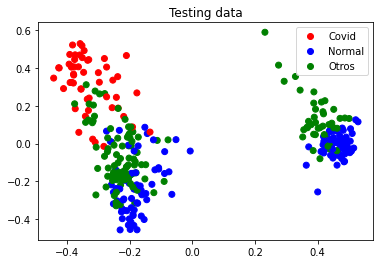

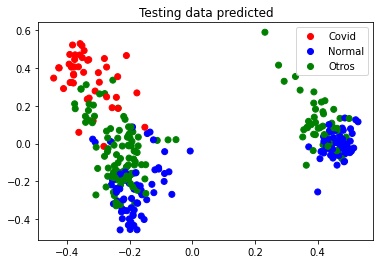

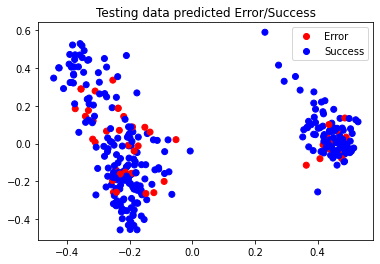

pred
0     48
1    276
dtype: int64


In [23]:
#Plotting results

X=X_validation
class_replace=y_validation
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data')
plt.show()


X=X_validation
class_replace=pd.DataFrame([y_pred_validation])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data predicted')
plt.show()

y_pred_validation=pd.DataFrame(y_pred_validation,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_validation)):
    if y_pred_validation.iloc[i][0]==y_validation.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_validation
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Validation data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


#Plotting results

X=X_test
class_replace=y_test
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data')
plt.show()


X=X_test
class_replace=pd.DataFrame([y_pred_test])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data predicted')
plt.show()

y_pred_testing=pd.DataFrame(y_pred_test,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_testing)):
    if y_pred_testing.iloc[i][0]==y_test.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_test
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Testing data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


In [24]:
#Logistic Regression
N_train_svc_logistic=N_training[0]

#Sampling and splitting the data
X_train,y_train,X_test,y_test,X_validation,y_validation = data_spliter(data,0.6,N_train_svc_linear)
#Training
model = LogisticRegression(random_state=42)
clf = model.fit(X_train, y_train)
#Prediction
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
y_pred_validation=clf.predict(X_validation)

#Performance measure of the model (traing and testing error)
#Training error
y_true=y_train
y_pred=y_pred_train
df=pd.DataFrame({'y_true':y_true,'y_pred':y_pred})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
training_error_0=training_error(df_0['y_true'].values,df_0['y_pred'].values)
training_error_1=training_error(df_1['y_true'].values,df_1['y_pred'].values)
training_error_2=training_error(df_2['y_true'].values,df_2['y_pred'].values)
training_error_pd=pd.Series({'covid_class':training_error_0,'normal_class':training_error_1,'otros_class':training_error_2},name='training_error')

#Testing error
y_true=y_test
y_pred=y_pred_test
df=pd.DataFrame({'y_true':y_test,'y_pred':y_pred_test})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
testing_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
testing_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
testing_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
testing_error_0
testing_error_pd=pd.Series({'covid_class':testing_error_0,'normal_class':testing_error_1,'otros_class':testing_error_2},name='testing_error')

#validation error
y_true=y_validation
y_pred=y_pred_validation
df=pd.DataFrame({'y_true':y_validation,'y_pred':y_pred_validation})
#Separate for each class
df_0=df[df['y_true']=='covid']
df_1=df[df['y_true']=='normal']
df_2=df[df['y_true']=='otros']
validation_error_0=testing_error(df_0['y_true'].values,df_0['y_pred'].values)
validation_error_1=testing_error(df_1['y_true'].values,df_1['y_pred'].values)
validation_error_2=testing_error(df_2['y_true'].values,df_2['y_pred'].values)
validation_error_pd=pd.Series({'covid_class':validation_error_0,'normal_class':validation_error_1,'otros_class':validation_error_2},name='validation_error')

#Concatetaion of the errors
error_pd_logistic=pd.concat([training_error_pd,testing_error_pd,validation_error_pd],axis=1)
error_pd_logistic


,training_error,testing_error,validation_error
covid_class,0.095238,0.283019,0.222222
normal_class,0.046875,0.114865,0.101562
otros_class,0.068493,0.105691,0.131250


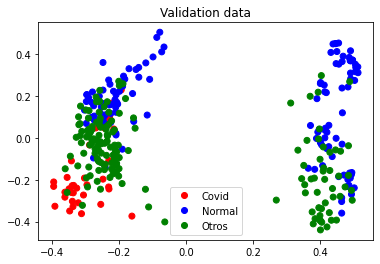

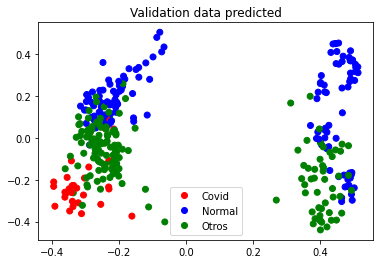

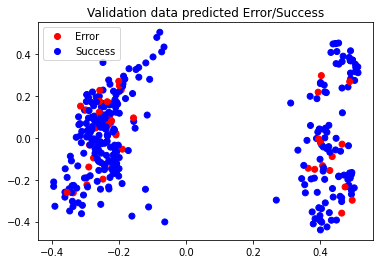

pred
0     42
1    282
dtype: int64


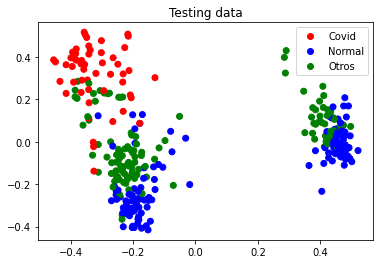

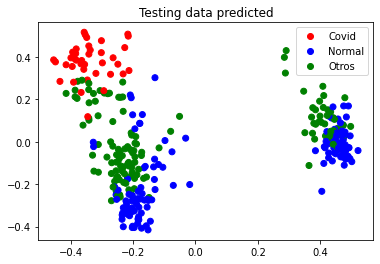

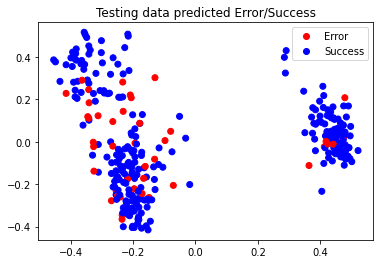

pred
0     45
1    279
dtype: int64


In [25]:
#Plotting results

X=X_validation
class_replace=y_validation
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data')
plt.show()


X=X_validation
class_replace=pd.DataFrame([y_pred_validation])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Validation data predicted')
plt.show()

y_pred_validation=pd.DataFrame(y_pred_validation,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_validation)):
    if y_pred_validation.iloc[i][0]==y_validation.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_validation
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Validation data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


#Plotting results

X=X_test
class_replace=y_test
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data')
plt.show()


X=X_test
class_replace=pd.DataFrame([y_pred_test])
class_replace=class_replace.replace({'covid': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b','g'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Covid','Normal','Otros'])
plt.title('Testing data predicted')
plt.show()

y_pred_testing=pd.DataFrame(y_pred_test,columns=['clase_cluster_pred'])
pred=[]
for i in range(len(y_pred_testing)):
    if y_pred_testing.iloc[i][0]==y_test.iloc[i]:
        pred.append(1)
    else:
        pred.append(0)

pred=pd.DataFrame(pred,columns=['pred'])

X=X_test
class_replace=pred
#class_replace=class_replace.replace({'True': 0, 'normal': 1, 'otros':2})
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
colors = ListedColormap(['r','b'])
scatter = plt.scatter(data2D[:,0], data2D[:,1], c=class_replace.values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Error','Success'])
plt.title('Testing data predicted Error/Success')
plt.show()

print(pred.groupby('pred').size())


## Final results

In [26]:
#To concatenate the errors of the different models with a dataframe with different levels of the index
result = pd.concat([error_pd_logistic,error_pd_svm_lin,error_pd_svm_pol,error_pd_svm_rbf,error_pd_tree], keys=["Logistic Regression", "SVM/ Lineal kernel", "SVM/ Polinomial kernel", "SVM/ RBF kernel", "Decision Tree"], axis=0)
result

training_error  testing_error  \
Logistic Regression    covid_class         0.095238       0.283019   
                       normal_class        0.046875       0.114865   
                       otros_class         0.068493       0.105691   
SVM/ Lineal kernel     covid_class         0.210526       0.377358   
                       normal_class        0.016393       0.084507   
                       otros_class         0.089744       0.162791   
SVM/ Polinomial kernel covid_class         0.000000       0.250000   
                       normal_class        0.000000       0.134752   
                       otros_class         0.000000       0.076336   
SVM/ RBF kernel        covid_class         0.000000       0.230769   
                       normal_class        0.014286       0.145985   
                       otros_class         0.015385       0.118519   
Decision Tree          covid_class         0.219178       0.235294   
                       normal_class        0.166667       0.188406   
                       otros_class         0.113122       0.161290   

                                     validation_error  
Logistic Regression    covid_class           0.222222  
                       normal_class          0.101562  
                       otros_class           0.131250  
SVM/ Lineal kernel     covid_class           0.333333  
                       normal_class          0.048000  
                       otros_class           0.134969  
SVM/ Polinomial kernel covid_class           0.194444  
                       normal_class          0.088000  
                       otros_class           0.104294  
SVM/ RBF kernel        covid_class           0.114286  
                       normal_class          0.080000  
                       otros_class           0.152439  
Decision Tree          covid_class           0.333333  
                       normal_class          0.145161  
                       otros_class           0.117647